In [135]:
library(fpp2)
library(ggfortify)
library(gridExtra)

In [136]:
hs_stock <- c(8480, 8080, 7680, 7280, 7150, 6750, 6450, 6150, 6150, 6450, 6750, 7000, 
           7140, 7540, 7140, 6740, 6650, 6450, 6150, 6450, 6150, 5720, 5420, 5120, 
           4820, 4860, 5060, 5360, 5300, 5320, 5220, 5030, 5090, 5000, 5050, 5350, 
           5650, 5950, 6250, 6250, 6300, 6600, 6900, 7100, 7200, 7600, 8000, 8400, 
           8480, 8600, 8410, 8010, 7700, 8100, 8450, 8460, 8260, 7860, 8100, 7900, 
           7920, 7940, 8150, 8150, 7900, 7850, 7860, 7900, 7900, 7910, 8100, 7700, 
           7700, 7650, 7700, 7600, 7390, 7100, 6700, 6510, 6810, 6750, 6450, 6230, 
           6200, 6400, 6100, 6100, 6400, 6700, 6400, 6300, 6400, 6700, 7000, 7400, 
           7800, 7500, 7600, 8000, 8400, 8200, 7800, 8000, 7940, 8300, 8110, 8510, 
           8600, 8900, 9200, 9550, 9950, 10300, 10900, 10300, 10900, 10600)
ts_hs_stock <- ts(hs_stock, start = c(1991, 12, 1), frequency = 365)
ts_hs_stock
data <- cbind ("시계열 자료" = ts_hs_stock,
              "1차 차분" = diff(ts_hs_stock))
str(data)

Time Series:
Start = c(1991, 12) 
End = c(1991, 129) 
Frequency = 365 
  [1]  8480  8080  7680  7280  7150  6750  6450  6150  6150  6450  6750  7000
 [13]  7140  7540  7140  6740  6650  6450  6150  6450  6150  5720  5420  5120
 [25]  4820  4860  5060  5360  5300  5320  5220  5030  5090  5000  5050  5350
 [37]  5650  5950  6250  6250  6300  6600  6900  7100  7200  7600  8000  8400
 [49]  8480  8600  8410  8010  7700  8100  8450  8460  8260  7860  8100  7900
 [61]  7920  7940  8150  8150  7900  7850  7860  7900  7900  7910  8100  7700
 [73]  7700  7650  7700  7600  7390  7100  6700  6510  6810  6750  6450  6230
 [85]  6200  6400  6100  6100  6400  6700  6400  6300  6400  6700  7000  7400
 [97]  7800  7500  7600  8000  8400  8200  7800  8000  7940  8300  8110  8510
[109]  8600  8900  9200  9550  9950 10300 10900 10300 10900 10600

 Time-Series [1:118, 1:2] from 1991 to 1991: 8480 8080 7680 7280 7150 6750 6450 6150 6150 6450 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "시계열 자료" "1차 차분"


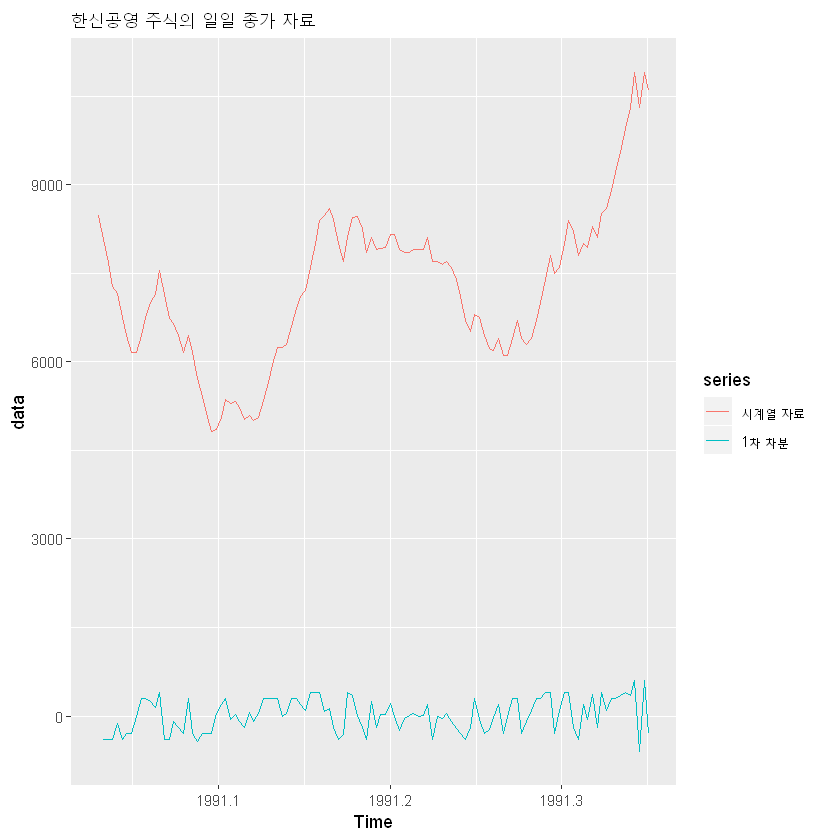

In [163]:
autoplot(data, facets = FALSE) +
    ggtitle("한신공영 주식의 일일 종가 자료")

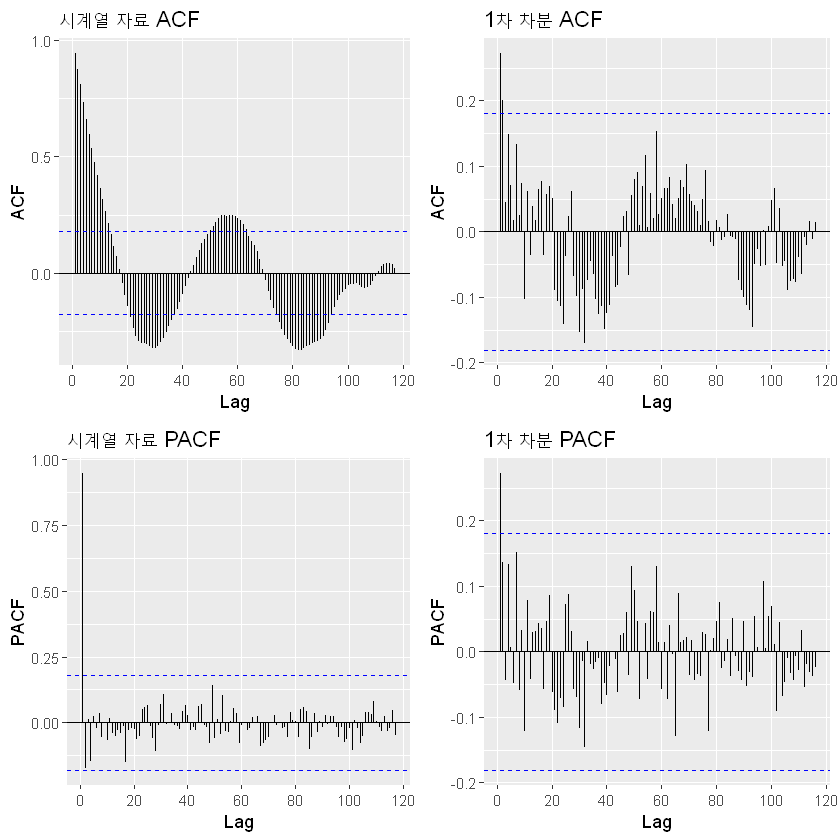

In [144]:
p1 <- ggAcf(data[,"시계열 자료"]) + ggtitle("시계열 자료 ACF")
p2 <- ggPacf(data[,"시계열 자료"]) + ggtitle("시계열 자료 PACF")
p3 <- ggAcf(data[,"1차 차분"]) + ggtitle("1차 차분 ACF")
p4 <- ggPacf(data[,"1차 차분"]) + ggtitle("1차 차분 PACF")

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 3),
        c(2, 4)))

In [152]:
# AR(1)
AR1 <- Arima(data[,"시계열 자료"], order=c(1,0,0))
AR1
cat("==================================================")
# AR(2)
AR2 <- Arima(data[,"시계열 자료"], order=c(2,0,0))
AR2
cat("==================================================")
# MA(1)
MA1 <- Arima(data[,"시계열 자료"], order=c(0,0,1))
MA1
cat("==================================================")
# MA(2)
MA2 <- Arima(data[,"시계열 자료"], order=c(0,0,2))
MA2
cat("==================================================")
# ARMA(1, 1)
ARMA11 <- Arima(data[,"시계열 자료"], order=c(1,0,1))
ARMA11

Series: data[, "시계열 자료"] 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.9866  8524.667
s.e.  0.0123  1377.111

sigma^2 estimated as 78201:  log likelihood=-833
AIC=1671.99   AICc=1672.2   BIC=1680.3

Series: data[, "시계열 자료"] 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      mean
      1.2754  -0.2955  8093.080
s.e.  0.0888   0.0904  1060.104

sigma^2 estimated as 72269:  log likelihood=-827.85
AIC=1663.7   AICc=1664.05   BIC=1674.78

Series: data[, "시계열 자료"] 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1       mean
      1.0000  7271.1424
s.e.  0.0499   129.7657

sigma^2 estimated as 509577:  log likelihood=-944.15
AIC=1894.31   AICc=1894.52   BIC=1902.62

Series: data[, "시계열 자료"] 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1     ma2       mean
      1.3736  0.8208  7284.9132
s.e.  0.0713  0.0434   142.2686

sigma^2 estimated as 243864:  log likelihood=-899.31
AIC=1806.63   AICc=1806.98   BIC=1817.71

Series: data[, "시계열 자료"] 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1      mean
      0.9799  0.2191  8286.300
s.e.  0.0170  0.0781  1212.873

sigma^2 estimated as 74060:  log likelihood=-829.29
AIC=1666.58   AICc=1666.94   BIC=1677.67


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 21.983, df = 20.6, p-value = 0.3766

Model df: 3.   Total lags used: 23.6



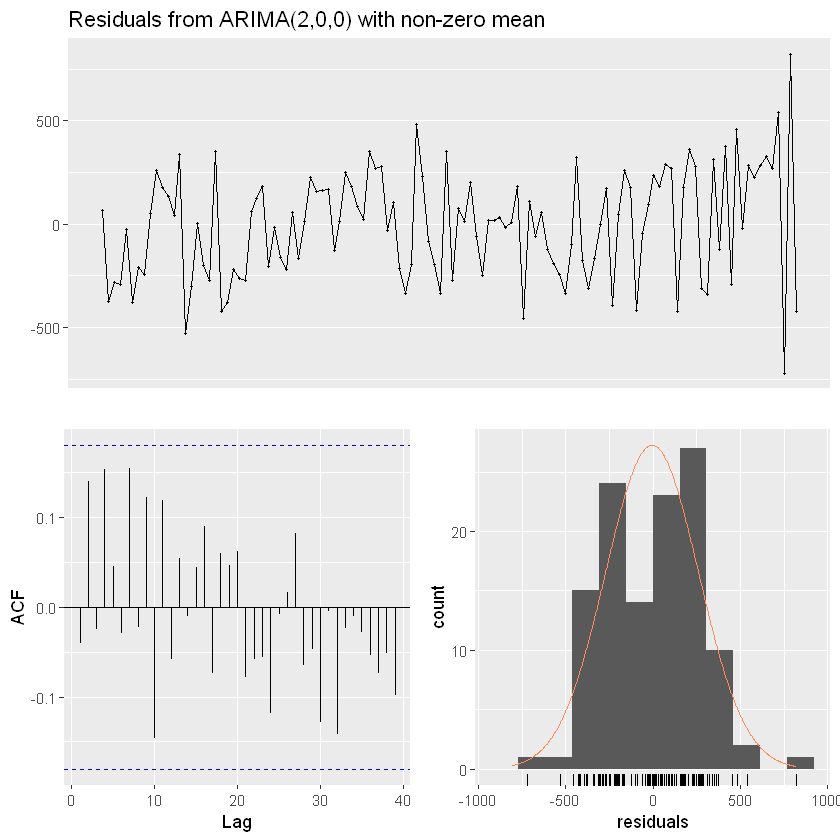

In [154]:
# AR(2)
AR2 <- Arima(data[,"시계열 자료"], order=c(2,0,0))
checkresiduals(AR2)